In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout,Flatten

C:\Users\CHAUDCH\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\CHAUDCH\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv(r"CarDekho.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df.Car_Name.unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

In [6]:
# Import label encoder
from sklearn import preprocessing

# Create a label encoder object
label_encoder = preprocessing.LabelEncoder()

# Encode labels in the 'Transmission' column
df['Transmission'] = label_encoder.fit_transform(df['Transmission'])

In [7]:
df['Seller_Type'] = label_encoder.fit_transform(df['Seller_Type'])

In [8]:
df['Fuel_Type'] = label_encoder.fit_transform(df['Fuel_Type'])

In [9]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,2,0,1,0
3,wagon r,2011,2.85,4.15,5200,2,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0


In [10]:
df['Car_Name'] = label_encoder.fit_transform(df['Car_Name'])

In [11]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,90,2014,3.35,5.59,27000,2,0,1,0
1,93,2013,4.75,9.54,43000,1,0,1,0
2,68,2017,7.25,9.85,6900,2,0,1,0
3,96,2011,2.85,4.15,5200,2,0,1,0
4,92,2014,4.60,6.87,42450,1,0,1,0


In [12]:
df.Car_Name.unique()

array([90, 93, 68, 96, 92, 95, 91, 62, 76, 73, 63, 85,  0, 65, 89, 81, 86,
       71, 77, 78, 80, 70, 79, 67, 88, 49, 56, 42, 11, 46, 43, 40, 48, 41,
       44, 17, 45, 47,  6,  4, 32, 60, 58, 51, 14, 37, 20,  7,  5, 57, 12,
       15, 52, 26, 16, 61, 31, 54, 38,  8, 28,  1, 25, 34, 59, 13,  2, 35,
       22, 39, 30, 53, 23, 27, 33,  9, 50, 55, 36, 21, 29, 10, 24, 19, 18,
        3, 84, 82, 83, 75, 97, 74, 72, 94, 69, 66, 64, 87])

In [13]:
df.corr()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
Car_Name,1.000000,0.017265,0.499198,0.475539,0.064453,-0.371446,-0.829718,-0.059855,-0.081192
Year,0.017265,1.000000,0.236141,-0.047584,-0.524342,-0.053643,-0.039896,0.000394,-0.182104
Selling_Price,0.499198,0.236141,1.000000,0.878983,0.029187,-0.509467,-0.550724,-0.367128,-0.088344
Present_Price,0.475539,-0.047584,0.878983,1.000000,0.203647,-0.440415,-0.512030,-0.348715,0.008057
Kms_Driven,0.064453,-0.524342,0.029187,0.203647,1.000000,-0.166801,-0.101419,-0.162510,0.089216
Fuel_Type,-0.371446,-0.053643,-0.509467,-0.440415,-0.166801,1.000000,0.352415,0.080466,0.055705
Seller_Type,-0.829718,-0.039896,-0.550724,-0.512030,-0.101419,0.352415,1.000000,0.063240,0.124269
Transmission,-0.059855,0.000394,-0.367128,-0.348715,-0.162510,0.080466,0.063240,1.000000,-0.050316
Owner,-0.081192,-0.182104,-0.088344,0.008057,0.089216,0.055705,0.124269,-0.050316,1.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    int32  
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    int32  
 6   Seller_Type    301 non-null    int32  
 7   Transmission   301 non-null    int32  
 8   Owner          301 non-null    int64  
dtypes: float64(2), int32(4), int64(3)
memory usage: 16.6 KB


In [15]:
df.Owner.unique()

array([0, 1, 3], dtype=int64)

In [16]:
print(df.Year.unique())
print(df.Present_Price.unique())
print(df.Year.unique())

[2014 2013 2017 2011 2018 2015 2016 2009 2010 2012 2003 2008 2006 2005
 2004 2007]
[ 5.59   9.54   9.85   4.15   6.87   9.83   8.12   8.61   8.89   8.92
  3.6   10.38   9.94   7.71   7.21  10.79   5.09   7.98   3.95   5.71
  8.01   3.46   4.41   4.99   5.87   6.49   5.98   4.89   7.49   9.95
  8.06   7.74   7.2    2.28   3.76   7.87   3.98   7.15   2.69  12.04
  9.29  30.61  19.77  10.21  15.04   7.27  18.54   6.8   35.96  18.61
  7.7   36.23   6.95  23.15  20.45  13.74  20.91   6.76  12.48   8.93
 14.68  12.35  22.83  14.89   7.85  25.39  13.46  23.73  92.6    6.05
 16.09  13.7   22.78  18.64   1.9    1.82   1.78   1.6    1.47   2.37
  3.45   1.5    2.4    1.4    1.26   1.17   1.75   0.95   0.8    0.87
  0.84   0.82   0.81   0.74   1.2    0.787  0.99   0.94   0.826  0.55
  0.88   0.51   0.52   0.54   0.73   0.83   0.64   0.72   1.05   0.57
  0.48   0.58   0.47   0.75   0.65   0.32   6.79   5.7    4.6    4.43
  7.13   8.1   14.79  13.6    9.4    7.6    9.9    6.82   5.35   7.
  5.97   

In [17]:
df.Year.isnull().sum()

0

In [18]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,90,2014,3.35,5.59,27000,2,0,1,0
1,93,2013,4.75,9.54,43000,1,0,1,0
2,68,2017,7.25,9.85,6900,2,0,1,0
3,96,2011,2.85,4.15,5200,2,0,1,0
4,92,2014,4.60,6.87,42450,1,0,1,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    int32  
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    int32  
 6   Seller_Type    301 non-null    int32  
 7   Transmission   301 non-null    int32  
 8   Owner          301 non-null    int64  
dtypes: float64(2), int32(4), int64(3)
memory usage: 16.6 KB


In [20]:
df.Year.unique()

array([2014, 2013, 2017, 2011, 2018, 2015, 2016, 2009, 2010, 2012, 2003,
       2008, 2006, 2005, 2004, 2007], dtype=int64)

In [21]:
df['Car_Age'] = 2024 - df['Year']

In [22]:
df.drop('Year', axis= 1)

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,90,3.35,5.59,27000,2,0,1,0,10
1,93,4.75,9.54,43000,1,0,1,0,11
2,68,7.25,9.85,6900,2,0,1,0,7
3,96,2.85,4.15,5200,2,0,1,0,13
4,92,4.60,6.87,42450,1,0,1,0,10
...,...,...,...,...,...,...,...,...,...
296,69,9.50,11.60,33988,1,0,1,0,8
297,66,4.00,5.90,60000,2,0,1,0,9
298,69,3.35,11.00,87934,2,0,1,0,15
299,69,11.50,12.50,9000,1,0,1,0,7


In [23]:
X = df.drop('Selling_Price', axis= 1)

In [24]:
X.head()

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,90,2014,5.59,27000,2,0,1,0,10
1,93,2013,9.54,43000,1,0,1,0,11
2,68,2017,9.85,6900,2,0,1,0,7
3,96,2011,4.15,5200,2,0,1,0,13
4,92,2014,6.87,42450,1,0,1,0,10


In [25]:
y=df['Selling_Price']

In [26]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [51]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [52]:
from sklearn.linear_model import LinearRegression
model_1 = LinearRegression()

In [53]:
model_1.fit(X_train,y_train)

LinearRegression()

In [54]:
y_pred = model_1.predict(X_test)

In [55]:
y_pred

array([ 7.14308223e+00, -4.32707285e-01,  4.28866337e+00,  8.66195149e+00,
        1.41541185e+01,  4.91348009e+00,  3.52994182e+00,  1.45144603e+00,
        5.37609192e+00,  4.65776530e+00,  2.25073266e+00,  1.64017867e+00,
        5.09825684e+00,  7.63941111e+00,  8.25436700e+00,  1.42042236e+01,
        7.39114034e+00,  4.27727070e+00, -4.59475111e-01,  2.37766653e+00,
        5.01986953e+00,  3.80921422e+00,  6.48683553e+00,  8.14794545e+00,
       -1.91767818e+00,  1.92746021e+00, -8.12324196e-01,  8.19703355e-01,
        1.39280600e-02,  7.20836278e+00,  3.07829441e+00,  7.05785145e+00,
        7.34577697e-01,  7.55465767e+00,  3.57352032e+00,  1.81020880e+00,
        5.59917338e+00,  6.59296216e+00, -2.71869136e+00,  8.76569081e+00,
        8.83391058e+00,  1.99075382e+01,  4.39995273e+00,  3.85411164e+00,
        6.26845611e+00,  9.52287308e+00,  1.23264522e-01,  1.68276056e+00,
        5.18317333e+00,  6.95396364e+00,  8.16429995e+00,  4.19754812e+00,
        4.91688688e+00,  

In [56]:
pd.DataFrame(model_1.coef_,X.columns,columns=['Coeff'])

,Coeff
Car_Name,-0.015207
Year,0.577733
Present_Price,3.913634
Kms_Driven,-0.231834
Fuel_Type,-0.612902
Seller_Type,-0.550308
Transmission,-0.468495
Owner,-0.236452
Car_Age,-0.577733


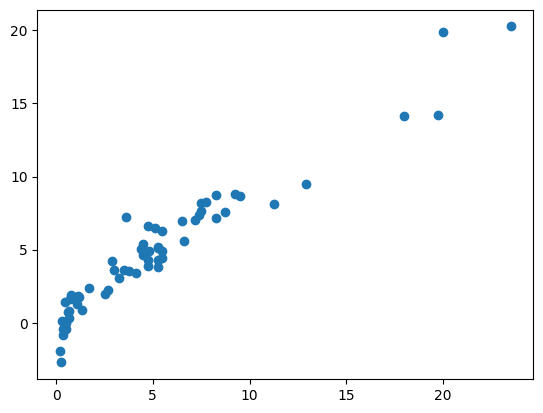

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(y_test,y_pred)

In [58]:
from sklearn import metrics

In [59]:
metrics.mean_absolute_error(y_test,y_pred)

0.9992677375917817

In [60]:
metrics.mean_squared_error(y_test,y_pred)

2.1868189190905234

In [61]:
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

1.478789680478777

Epoch 1/100
20/20 [==============================] - 1s 9ms/step - loss: 45.6264 - mean_squared_error: 45.6264 - val_loss: 23.6539 - val_mean_squared_error: 23.6539
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 38.1481 - mean_squared_error: 38.1481 - val_loss: 18.2532 - val_mean_squared_error: 18.2532
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 29.8878 - mean_squared_error: 29.8878 - val_loss: 11.8754 - val_mean_squared_error: 11.8754
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 20.4380 - mean_squared_error: 20.4380 - val_loss: 7.2067 - val_mean_squared_error: 7.2067
Epoch 5/100
20/20 [==============================] - 0s 3ms/step - loss: 14.1948 - mean_squared_error: 14.1948 - val_loss: 4.9409 - val_mean_squared_error: 4.9409
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 9.1898 - mean_squared_error: 9.1898 - val_loss: 4.0311 - val_mean_squared_error: 4.0311
Epoch 7/100
20/20 

20/20 [==============================] - 0s 3ms/step - loss: 0.4051 - mean_squared_error: 0.4051 - val_loss: 0.7289 - val_mean_squared_error: 0.7289
Epoch 52/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4048 - mean_squared_error: 0.4048 - val_loss: 0.7093 - val_mean_squared_error: 0.7093
Epoch 53/100
20/20 [==============================] - 0s 2ms/step - loss: 0.3928 - mean_squared_error: 0.3928 - val_loss: 0.7497 - val_mean_squared_error: 0.7497
Epoch 54/100
20/20 [==============================] - 0s 2ms/step - loss: 0.3783 - mean_squared_error: 0.3783 - val_loss: 0.7525 - val_mean_squared_error: 0.7525
Epoch 55/100
20/20 [==============================] - 0s 2ms/step - loss: 0.3727 - mean_squared_error: 0.3727 - val_loss: 0.7234 - val_mean_squared_error: 0.7234
Epoch 56/100
20/20 [==============================] - 0s 2ms/step - loss: 0.3748 - mean_squared_error: 0.3748 - val_loss: 0.7119 - val_mean_squared_error: 0.7119
Epoch 57/100
20/20 [=====================

2/2 [==============================] - 0s 3ms/step

Predicted Prices: [ 7.0199313   0.7642239   3.9010463   9.729266   19.31492     4.7215886
  3.2308714   0.880912    4.394356    4.066014    2.36216     0.92104226
  4.31783     7.5504775   8.891444   19.624664    8.042524    4.2748866
  0.63751173  1.6482462   3.367644    5.8590817   6.1129804  10.385199
  0.21256271  1.0014199   0.36242753  0.6800846   0.6488483   2.6850526
  1.0243437   6.4296093   0.40565217  7.502933    2.907372    1.186288
  5.91379     5.577239    0.06466135  9.489514   10.175283   22.536486
  4.228384    5.455241    4.930913   11.567377    0.5609503   1.0847442
  4.3602157   6.679904    8.118973    3.235636    4.4688606  24.18361
  1.0357312   0.93411785  0.5962349   2.4944236   3.3370502   1.7903507
  3.00481   ]
Actual Prices: [ 8.25  0.5   5.25  9.5  18.    5.5   3.75  0.45  4.5   4.5   2.7   0.72
  5.25  7.5   7.75 19.75  7.4   4.75  0.35  1.7   4.4   5.25  5.11 11.25
  0.2   0.78  0.38  0.65  0.5   3.6   3

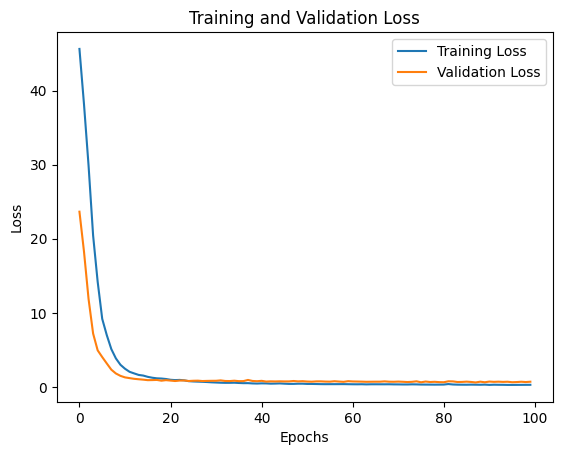

In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 5. Build the ANN model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    Dense(32, activation='relu'),  # Hidden layer
    Dense(1)  # Output layer (single value: predicted price)
])

# 6. Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

# 7. Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.2, verbose=1)

# 8. Evaluate the model
loss, mse = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Mean Squared Error: {mse}")

# 9. Make predictions
y_pred_2 = model.predict(X_test)
print("\nPredicted Prices:", y_pred_2.flatten())
print("Actual Prices:", y_test.values)

# 10. Plot training loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title("Training and Validation Loss")
plt.show()


In [67]:
from sklearn.metrics import r2_score

r2_test = r2_score(y_test, y_pred)
r2_test

0.9134869106859314

In [68]:
r2_test = r2_score(y_test, y_pred_2)
r2_test

0.9752380143304896